In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde
import seaborn as sns

In [17]:
# Generate a dataset with two Gaussian components
mu1, sigma1 = 2, 1
mu2, sigma2 = -1, 0.8
X1 = np.random.normal(mu1, sigma1, size=200)
X2 = np.random.normal(mu2, sigma2, size=600)
X = np.concatenate([X1, X2])
X

array([ 2.15558071e+00,  2.77080771e+00,  2.37400603e+00,  1.34543201e+00,
        3.05902085e+00,  2.74330031e-01,  1.84110258e+00,  1.51009051e+00,
        2.37984319e+00,  2.51483421e+00,  2.27981586e+00,  2.77165821e+00,
        1.76571087e+00,  2.61786959e+00,  1.28373534e+00,  6.72458396e-01,
       -8.80225865e-01,  1.78647992e+00,  1.95691351e+00,  2.05740206e+00,
        2.10117718e+00,  7.43365706e-01,  2.06065975e+00,  3.55172683e+00,
        1.98230954e+00,  5.61753346e-01,  9.77340060e-01, -5.15033557e-01,
        2.63283500e+00,  3.73199070e+00,  2.99721314e+00,  1.40748687e+00,
        2.46997411e+00,  3.27318905e+00,  2.06991490e+00,  1.50924202e+00,
        1.39200115e+00,  2.45948063e+00,  1.19167136e+00,  2.61937147e+00,
        1.20904087e+00,  2.06116375e+00,  4.50632605e+00,  2.88195028e+00,
        3.22384757e+00,  1.96164430e+00,  2.55484722e+00,  1.22183965e+00,
        1.16884235e+00,  7.05549920e-01,  9.07016771e-01,  1.54233715e+00,
        1.56146862e+00,  

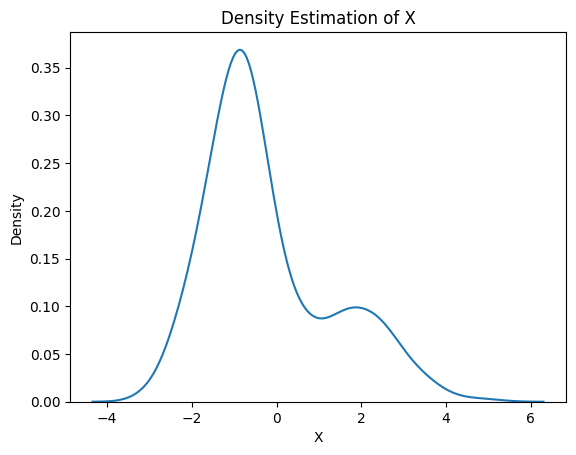

In [16]:
# Plot the density estimation using seaborn
sns.kdeplot(X)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Estimation of X')
plt.show()

In [13]:
# Initialize parameters
mu1_hat, sigma1_hat = np.mean(X1), np.std(X1)
mu2_hat, sigma2_hat = np.mean(X2), np.std(X2)
pi1_hat, pi2_hat = len(X1) / len(X), len(X2) / len(X)
pi1_hat

0.25

In [14]:
pi2_hat

0.75

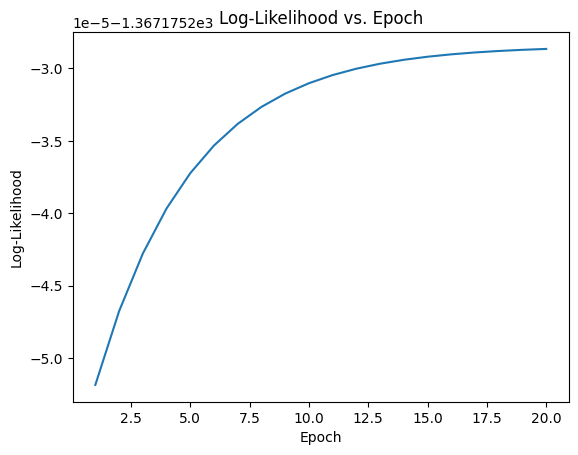

In [7]:
# Perform EM algorithm for 20 epochs
num_epochs = 20
log_likelihoods = []

for epoch in range(num_epochs):
    # E-step: Compute responsibilities
    gamma1 = pi1_hat * norm.pdf(X, mu1_hat, sigma1_hat)
    gamma2 = pi2_hat * norm.pdf(X, mu2_hat, sigma2_hat)
    total = gamma1 + gamma2
    gamma1 /= total
    gamma2 /= total

    # M-step: Update parameters
    mu1_hat = np.sum(gamma1 * X) / np.sum(gamma1)
    mu2_hat = np.sum(gamma2 * X) / np.sum(gamma2)
    sigma1_hat = np.sqrt(np.sum(gamma1 * (X - mu1_hat)**2) / np.sum(gamma1))
    sigma2_hat = np.sqrt(np.sum(gamma2 * (X - mu2_hat)**2) / np.sum(gamma2))
    pi1_hat = np.mean(gamma1)
    pi2_hat = np.mean(gamma2)

    # Compute log-likelihood
    log_likelihood = np.sum(np.log(pi1_hat * norm.pdf(X, mu1_hat, sigma1_hat)
                                   + pi2_hat * norm.pdf(X, mu2_hat, sigma2_hat)))
    log_likelihoods.append(log_likelihood)
# Plot log-likelihood values over epochs
plt.plot(range(1, num_epochs+1), log_likelihoods)
plt.xlabel('Epoch')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Epoch')
plt.show()

In [9]:
# Plot the final estimated density
X_sorted = np.sort(X)
density_estimation = pi1_hat*norm.pdf(X_sorted, mu1_hat, sigma1_hat) + pi2_hat * norm.pdf(X_sorted, mu2_hat, sigma2_hat)
density_estimation

array([0.00073117, 0.00088444, 0.00286106, 0.00702774, 0.01393057,
       0.01422321, 0.02050472, 0.02365297, 0.02909984, 0.03031446,
       0.03150247, 0.03426852, 0.05066377, 0.06438051, 0.06527182,
       0.06562584, 0.06734609, 0.06948055, 0.0703617 , 0.07079901,
       0.07101996, 0.07377872, 0.07414473, 0.07982408, 0.08237862,
       0.08412933, 0.08645473, 0.08758174, 0.08800493, 0.08983685,
       0.10086189, 0.10204717, 0.10722958, 0.10865369, 0.11099559,
       0.11576696, 0.11876207, 0.11912289, 0.12219661, 0.12386739,
       0.12746699, 0.12768232, 0.12970522, 0.13370533, 0.13777071,
       0.13910422, 0.14426677, 0.14716791, 0.15364469, 0.1573109 ,
       0.15790258, 0.16244028, 0.17027685, 0.1703002 , 0.17256526,
       0.17394726, 0.17511677, 0.1774254 , 0.17743113, 0.18136916,
       0.18176217, 0.18445019, 0.18934832, 0.19161619, 0.19450991,
       0.19479053, 0.19540858, 0.19610396, 0.1967305 , 0.19959689,
       0.19980118, 0.20002802, 0.20069045, 0.20268712, 0.20744

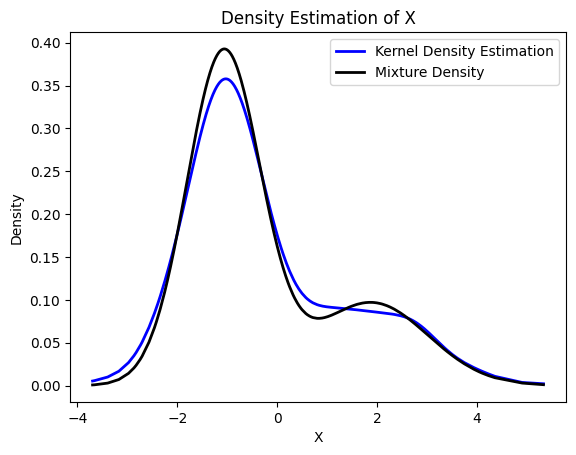

In [10]:
plt.plot(X_sorted, gaussian_kde(X_sorted)(X_sorted), color='blue', linewidth=2)
plt.plot(X_sorted, density_estimation, color='black', linewidth=2)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Estimation of X')
plt.legend(['Kernel Density Estimation','Mixture Density'])
plt.show()